In [40]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.cm import get_cmap
import seaborn as sns

from shapely.geometry import Polygon, MultiPolygon

import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd

# Set figure stile and size for entire notebook
sns.set_style("ticks")

In [41]:
# Import dataset 
df = pd.read_csv("../data/world-happiness-report-2024.txt")
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [42]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()
df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect'],
      dtype='object')

In [43]:
df = df.join(
    df.groupby('country_name')[['life_ladder']]
        .transform('mean')  # Calculate the mean for each group
        .rename(columns='mean_life_ladder'.format)) # Rename columns
#df_mean = df.groupby('country_name').mean()

In [44]:
columns = df.columns.tolist()
columns.insert(3, columns.pop(columns.index("mean_life_ladder")))
df = df.round({'mean_life_ladder': 3})
df = df.reindex(columns=columns)

In [45]:
df.head()

,country_name,year,life_ladder,mean_life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,Afghanistan,2008,3.724,3.22,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,3.22,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,3.22,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,3.22,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,3.22,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [46]:
df.country_name.nunique()

165

In [47]:
np.sort(df.year.unique())

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [48]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.replace(['Bosnia and Herz.'],'Bosnia and Herzegovina')
world = world.replace(['United States of America'],'United States')
world = world.replace(['Dominican Rep.'],'Dominican Republic')
world = world.replace(['Taiwan'],'Taiwan Province of China')
world = world.replace(['Palestine'],'State of Palestine')
world = world.replace(['Dem. Rep. Congo'],'Congo (Kinshasa)')
world = world.replace(['Congo'],'Congo (Brazzaville)')
world = world.replace(["Côte d'Ivoire"],'Ivory Coast')
world = world.replace(['Central African Rep.'],'Central African Republic')
world = world.replace(['eSwatini'],'Eswatini')
world = world.replace(['Somaliland'],'Somaliland region')
world = world.replace(['S. Sudan'],'South Sudan')
world = world.replace(['Turkey'],'Türkiye')

/var/folders/xp/szpgjcc16693xmv1q4_gmwgr0000gn/T/ipykernel_3858/2228960678.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [49]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [50]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    float64 
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    int64   
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [51]:
# merge two data frames
world_capstone = world.merge(df, left_on=['name'], right_on=['country_name'], how='left')

In [52]:
# Exclude Antarctica and Greenland from the map
world_capstone.drop(index = world_capstone[world_capstone['continent']=='Antarctica'].index, inplace=True)
world_capstone.drop(index = world_capstone[world_capstone['name']=='Greenland'].index, inplace=True)

In [53]:
world_capstone.query('country_name.isnull()')

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country_name,year,life_ladder,mean_life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,389482.0,North America,Bahamas,BHS,13578,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,3398.0,South America,Falkland Is.,FLK,282,"POLYGON ((-61.20000 -51.85000, -60.00000 -51.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,140.0,Seven seas (open ocean),Fr. S. Antarctic Lands,ATF,16,"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,1293119.0,Asia,Timor-Leste,TLS,2017,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,3193694.0,North America,Puerto Rico,PRI,104988,"POLYGON ((-66.28243 18.51476, -65.77130 18.426...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,1920922.0,Africa,Guinea-Bissau,GNB,1339,"POLYGON ((-16.67745 12.38485, -16.14772 12.547...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,1355986.0,Africa,Eq. Guinea,GNQ,11026,"POLYGON ((9.64916 2.28387, 11.27645 2.26105, 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


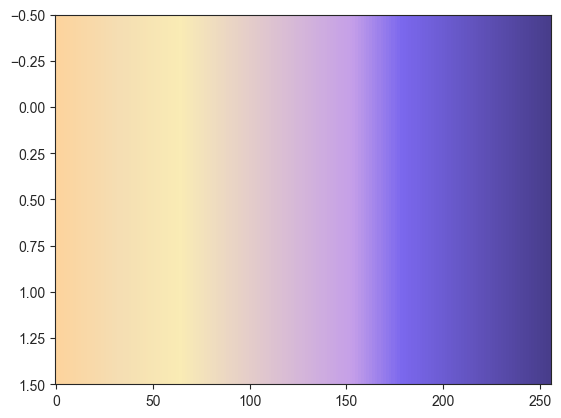

In [54]:
# create color map
ccolors = [(0, "#fdd49e"), (0.125, "wheat"), (0.25, "#faecb5"), (0.6, "#c59fe9"), (0.7, "mediumslateblue"),  (0.8, "slateblue"), (1, "darkslateblue")] # (0.5, "thistle"), (0.375, "lightyellow"),
col_cap = colors.LinearSegmentedColormap.from_list("", ccolors, N=len(world), gamma=1.0)
sns.set_palette(col_cap(np.linspace(0,1,col_cap.N)))

gradient = np.linspace(0.0, 1.0, 256)
gradient = np.vstack((gradient, gradient))

plt.imshow(gradient, aspect="auto", cmap=col_cap)
plt.show()

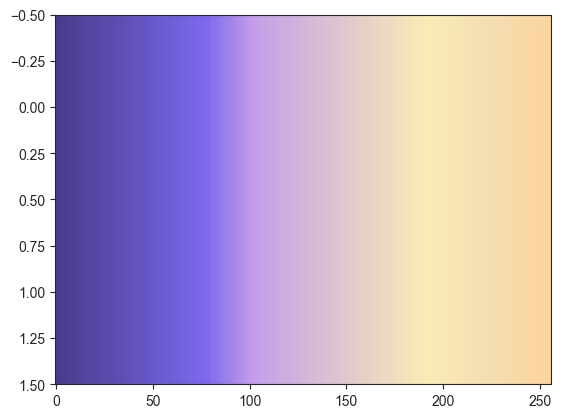

In [55]:
# create reversing colormap
col_cap_r = col_cap.reversed()
plt.imshow(gradient, aspect="auto", cmap=col_cap_r)
plt.show()

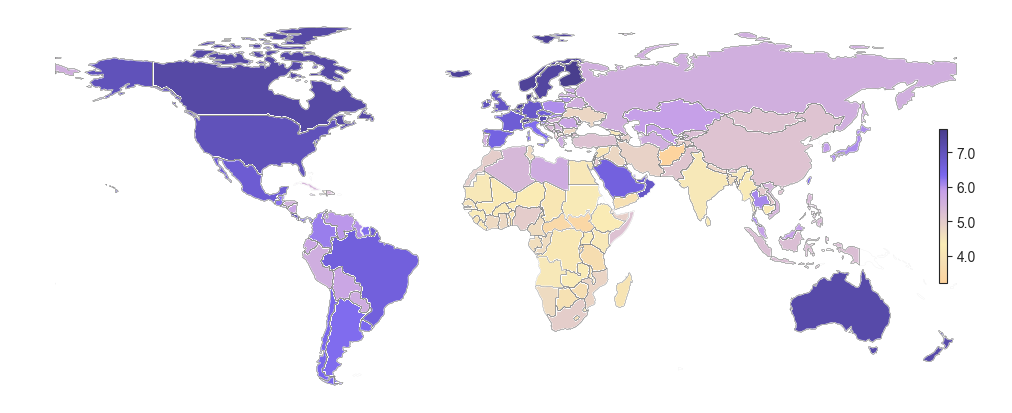

In [56]:
ax = world_capstone.boundary.plot(facecolor="none", edgecolor='gray', linewidth=0.03, figsize=(16, 10)) 
world_capstone.plot(ax=ax, column='mean_life_ladder', legend=True, cmap=col_cap, legend_kwds={'shrink':0.2,
                                                                                'orientation':'vertical',
                                                                                #'fraction':.01,
                                                                                #'pad':2.5,
                                                                                #'aspect':1.2,
                                                                                'anchor': (-.7, .5), # default (0.0, 0.5) if vertical
                                                                                'format':'%.1f'})

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
#ax.set_title('Life Ladder World, 2023', size=20, weight='bold')
plt.show();